# Data Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train_data.txt", sep=",")
df_train.shape

(5822, 87)

In [3]:
df_train.drop('ID', axis=1, inplace=True)

In [4]:
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df_test = pd.read_csv("test_data.txt", sep=",")
df_test.shape

(4000, 86)

In [6]:
df_test.head()

,ID,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,2,0,0,0,1,0,0,0,0,0
2,3,39,1,3,3,9,1,4,2,3,...,1,0,0,0,1,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,0,1,0,0,0,0,0


In [7]:
for col in df_train.columns:
    print("{}:{}".format(col, df_train[col].unique()))

1:[33 37  9 40 23 39 11 10 41 38 22 13 31 34 24  8  7  3 36 25 20 12 35 30
 29 32  1 26  2  4 16  5 21  6 18 27 28 17 15 19]
2:[ 1  2  3 10  5  7  4  8  6]
3:[3 2 4 1 5]
4:[2 3 1 4 5 6]
5:[ 8  3 10  5  9  7  2  1  6  4]
6:[0 1 2 3 4 6 5 9 7 8]
7:[5 4 3 2 7 1 6 9 0 8]
8:[1 2 0 3 4 5]
9:[3 4 5 2 6 7 0 1 9 8]
10:[7 6 3 5 0 1 9 8 2 4]
11:[0 2 1 6 4 3 5 7]
12:[2 4 3 0 1 6 5 7 8 9]
13:[1 0 4 2 3 5 6 7 8 9]
14:[2 4 3 5 6 0 1 7 8 9]
15:[6 5 2 4 3 1 7 9 8 0]
16:[1 0 3 5 4 2 6 7 8 9]
17:[2 5 4 3 1 7 6 0 8 9]
18:[7 4 2 0 5 6 8 3 1 9]
19:[1 0 4 2 3 6 5 7 9 8]
20:[0 5 1 2 3 4]
21:[1 0 4 3 2 5 6 7 8 9]
22:[2 5 7 3 0 4 1 9 6 8]
23:[5 0 1 2 8 3 4 6 7 9]
24:[2 4 0 5 1 3 7 6 9 8]
25:[1 0 3 9 2 4 5 6 7 8]
26:[1 2 5 0 3 4 8 6 9 7]
27:[2 3 0 1 4 6 5 7 8 9]
28:[6 5 4 0 8 1 2 7 3 9]
29:[1 0 2 5 3 4 7 6 9]
30:[1 2 7 5 4 9 6 0 8 3]
31:[8 7 2 4 5 0 3 9 1 6]
32:[8 7 9 6 5 4 3 2 1 0]
33:[0 1 2 3 4 6 5 7]
34:[1 2 0 3 4 6 5 7 8 9]
35:[8 6 9 7 5 4 3 1 2 0]
36:[1 3 0 2 4 5 6 8 7 9]
37:[0 2 4 1 5 7 3 9 6 8]
38:[4 0 5 

# Modelization

## Models with Original Dataset

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, balanced_accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

In [9]:
def model_performance(model, X_train, X_test, y_train, y_test):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)
    # Model Fitting & Prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    # Model Evaluation
    perform_metrics = {}
    perform_metrics['Accuracy Score'] = model.score(X_test, y_test)
    perform_metrics['Balanced Accuracy'] = balanced_accuracy_score(y_test, y_pred)
    perform_metrics['f1_score'] = f1_score(y_test, y_pred)
    perform_metrics['AUC_score'] = roc_auc_score(y_test, y_pred_proba)
    conf_mat = classification_report(y_test, y_pred)
    
    #print('Accuracy of {} Model: {:.2f} with auc score: {:2f}'.format(model_name, accuracy_score, auc_score))
    #print('Confusion Matrix of {} Model: \n'.format(model_name), conf_mat)
    return perform_metrics, conf_mat, y_pred, y_test

In [10]:
decTree = DecisionTreeClassifier(class_weight='balanced', random_state=888)
graBoost = GradientBoostingClassifier(n_estimators=100, random_state=888)
ranForest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=888)
balanced_ranForest = BalancedRandomForestClassifier(random_state=888)
bagging = BaggingClassifier(n_estimators=100, random_state=888)
balanced_bagging = BalancedBaggingClassifier(n_estimators=100, random_state=888)
adaBoost =AdaBoostClassifier(n_estimators=100, random_state=888)
easyEnsemble = EasyEnsembleClassifier(n_estimators=100, estimator=AdaBoostClassifier(n_estimators=100), random_state=888)
rusBoost = RUSBoostClassifier(n_estimators=100, random_state=888)
model_dict = {
    'Decision Tree': decTree,
    'Gradient Boosting': graBoost,
    'Random Forest': ranForest,
    'Balanced Random Forest': balanced_ranForest,
    'Bagging' : bagging,
    'Balanced Bagging': balanced_bagging,
    'AdaBoost' : adaBoost,
    'Easy Ensemble': easyEnsemble,
    'RUS Boost': rusBoost
}

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

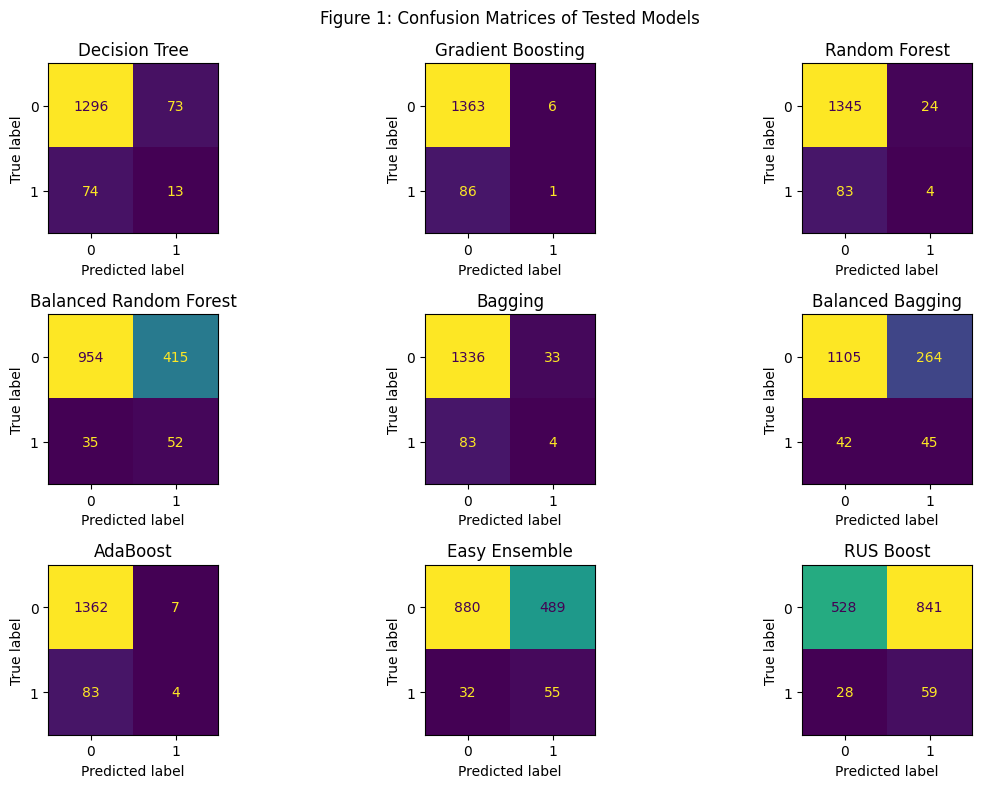

In [11]:
y = df_train['86']
X = df_train.drop('86', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=8)
def show_performance(model_dict, X_train, X_test, y_train, y_test, plt_title):
    summary_df = pd.DataFrame()
    index=[]

    fig, axs = plt.subplots(3, 3, figsize=(12, 8))
    fig.suptitle(plt_title)
    axs=axs.ravel()
    i=0
    for model_name, model in model_dict.items():
        index += model_name
        perform_metrics, _, y_pred, y_test = model_performance(model, X_train, X_test, y_train, y_test)
        summary_df = pd.concat([summary_df, pd.DataFrame(perform_metrics, index=[model_name])], axis=0)
        
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[i], colorbar=False)
        axs[i].set_title(model_name)
        i+=1
    fig.tight_layout()
    plt.show()
    return summary_df
summary_df1 = show_performance(model_dict, X_train, X_test, y_train, y_test, 'Figure 1: Confusion Matrices of Tested Models')

    #plt.show()

In [12]:
print(summary_df1)

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.899038           0.548051  0.150289   0.548294
Gradient Boosting             0.936813           0.503556  0.021277   0.768562
Random Forest                 0.926511           0.514223  0.069565   0.677158
Balanced Random Forest        0.690934           0.647280  0.187726   0.714705
Bagging                       0.920330           0.510936  0.064516   0.662901
Balanced Bagging              0.789835           0.662200  0.227273   0.723332
AdaBoost                      0.938187           0.520432  0.081633   0.718311
Easy Ensemble                 0.642170           0.637494  0.174326   0.699252
RUS Boost                     0.403159           0.531922  0.119554   0.599951


## PCA - Dimentionality Reduction

In [13]:
y=df_train['86']
X=df_train.drop('86', axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
pca.fit(X)

PCA(n_components=32)

In [14]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [15]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[59.22094864  9.65463437  3.9777836   2.95033711  2.78779882  2.37788309
  1.6928166   1.4466638   1.35779016  1.28517949  1.2310204   1.08245526
  0.96327672  0.92214499  0.78346595  0.74886218  0.65458169  0.6039845
  0.52388932  0.48723911  0.45079356  0.4437678   0.42809817  0.39401137
  0.36555574  0.29475657  0.27908804  0.26900465  0.25767096  0.22112772
  0.21580198  0.17161132]



In [16]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[59.22094864 68.87558302 72.85336662 75.80370373 78.59150255 80.96938564
 82.66220224 84.10886604 85.46665621 86.7518357  87.98285609 89.06531136
 90.02858808 90.95073308 91.73419903 92.48306121 93.1376429  93.7416274
 94.26551672 94.75275583 95.20354939 95.64731719 96.07541536 96.46942673
 96.83498247 97.12973904 97.40882708 97.67783172 97.93550269 98.1566304
 98.37243239 98.54404371]



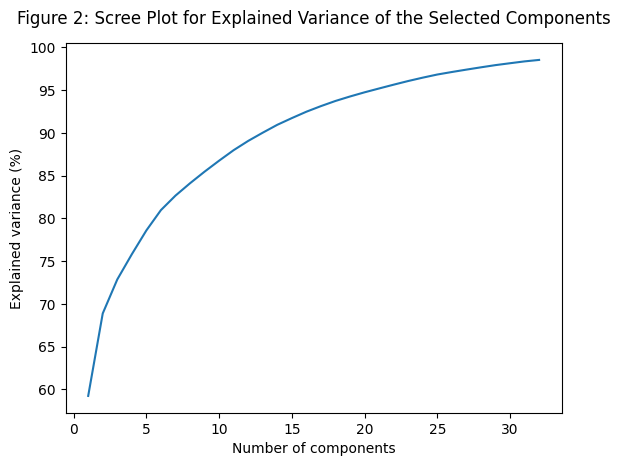

In [17]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) 
#    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.title('Figure 2: Scree Plot for Explained Variance of the Selected Components', y=1.03)
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [18]:
model_dict_pca = {
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=888),
    #'Logistic Regress': LogisticRegression(max_iter=200, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=888),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=888),
    'Balanced Random Forest': BalancedRandomForestClassifier(random_state=888),
    'Bagging' : BaggingClassifier(n_estimators=100, random_state=888),
    'Balanced Bagging': BalancedBaggingClassifier(n_estimators=100, random_state=888),
    'AdaBoost' : AdaBoostClassifier(n_estimators=100, random_state=888),
    'Easy Ensemble': EasyEnsembleClassifier(n_estimators=100, estimator=AdaBoostClassifier(n_estimators=100), random_state=888),
    'RUS Boost': RUSBoostClassifier(n_estimators=100, random_state=888)
    
}

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

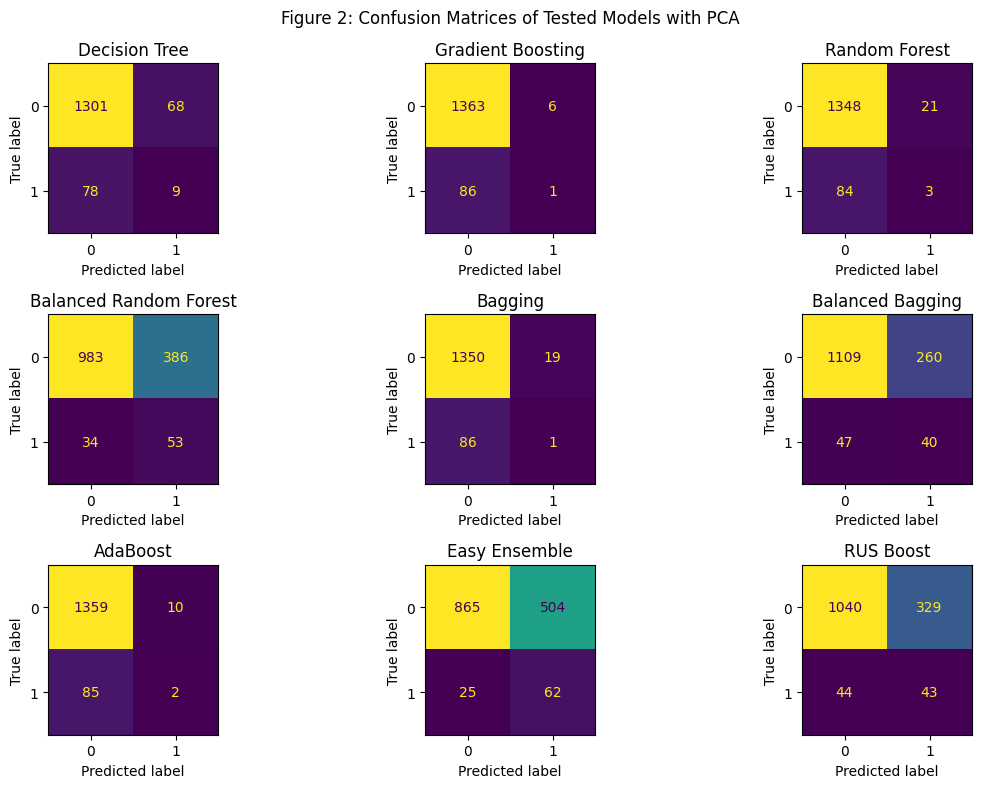

In [19]:
X_pca = pca.transform(X)
df_X_pca = pd.DataFrame(X_pca, columns=['pca_com{i}' for i in range(X_pca.shape[1])])
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_X_pca, y, test_size=0.25, stratify=y, random_state=888)
summary_df2 = show_performance(model_dict, X_train_pca, X_test_pca, y_train, y_test, 'Figure 2: Confusion Matrices of Tested Models with PCA')

In [20]:
print(summary_df2)

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.899725           0.526888  0.109756   0.526511
Gradient Boosting             0.936813           0.503556  0.021277   0.731153
Random Forest                 0.927885           0.509572  0.054054   0.673875
Balanced Random Forest        0.711538           0.663619  0.201521   0.721136
Bagging                       0.927885           0.498808  0.018692   0.683383
Balanced Bagging              0.789148           0.634925  0.206718   0.734146
AdaBoost                      0.934753           0.507842  0.040404   0.657150
Easy Ensemble                 0.636676           0.672246  0.189893   0.719075
RUS Boost                     0.743819           0.626966  0.187364   0.674551


## Sampling Methods

### Under Sampling

In [21]:
#Random Sampling
from imblearn.under_sampling import RandomUnderSampler
us_RUS = RandomUnderSampler()
X_RUS, y_RUS = us_RUS.fit_resample(X,y)
print(y_RUS.value_counts())


0    348
1    348
Name: 86, dtype: int64


c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

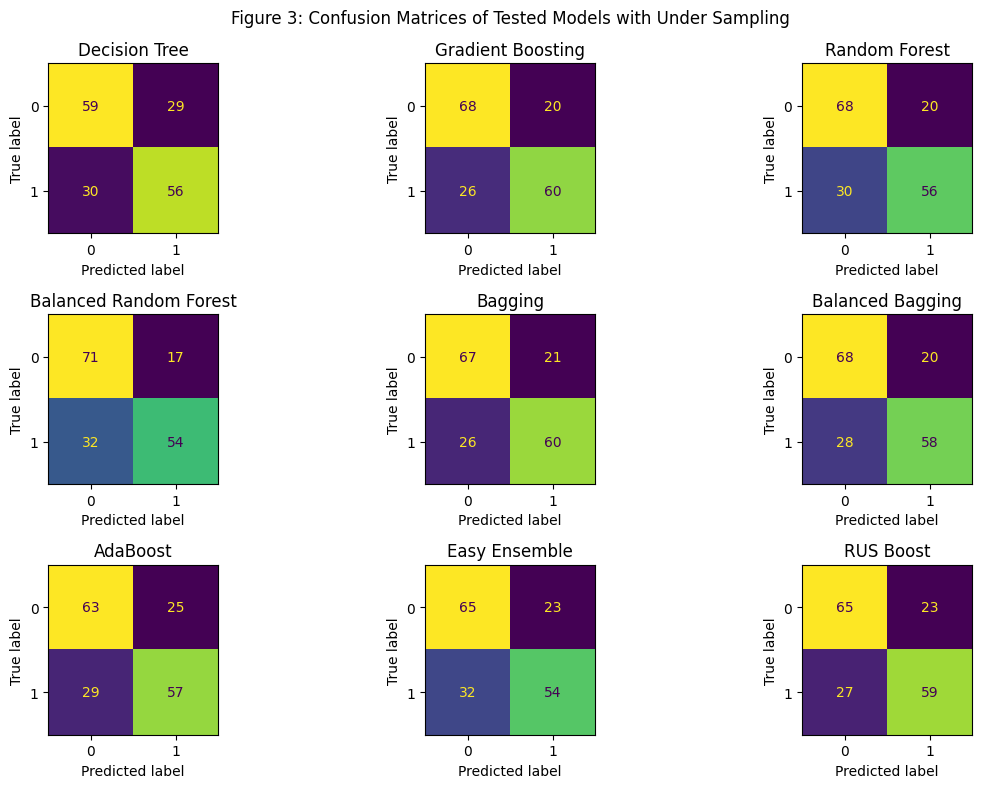

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.660920           0.660809  0.654971   0.660809
Gradient Boosting             0.735632           0.735201  0.722892   0.795058
Random Forest                 0.712644           0.711945  0.691358   0.743525
Balanced Random Forest        0.718391           0.717363  0.687898   0.757928
Bagging                       0.729885           0.729519  0.718563   0.773850
Balanced Bagging              0.724138           0.723573  0.707317   0.776427
AdaBoost                      0.689655           0.689350  0.678571   0.753237
Easy Ensemble                 0.683908           0.683272  0.662577   0.760703
RUS Boost                     0.712644           0.712341  0.702381   0.760505


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_RUS, y_RUS, test_size=0.25, random_state=8)
summary_df3 = show_performance(model_dict, X_train, X_test, y_train, y_test, 'Figure 3: Confusion Matrices of Tested Models with Under Sampling')
print(summary_df3)

In [23]:
from imblearn.under_sampling import ClusterCentroids
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
cc = ClusterCentroids(random_state=888)
X_cc, y_cc = cc.fit_resample(X, y)

y_cc.value_counts()

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    348
1    348
Name: 86, dtype: int64

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

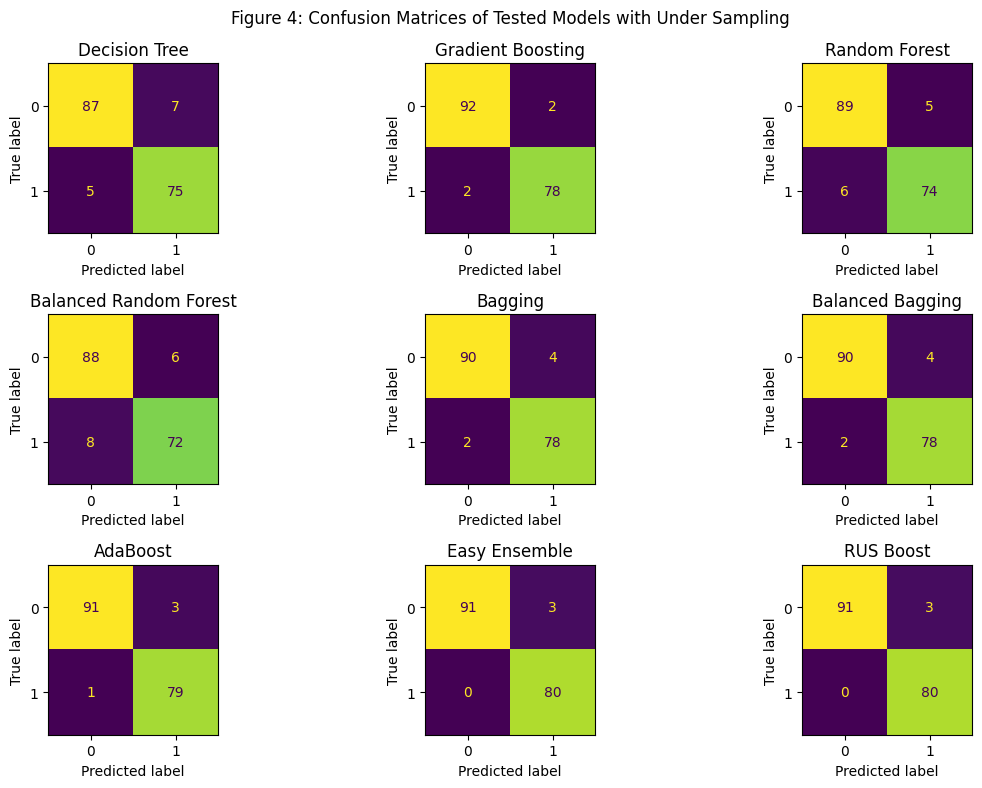

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.931034           0.931516  0.925926   0.931516
Gradient Boosting             0.977011           0.976862  0.975000   0.999202
Random Forest                 0.936782           0.935904  0.930818   0.991755
Balanced Random Forest        0.919540           0.918085  0.911392   0.989428
Bagging                       0.965517           0.966223  0.962963   0.989162
Balanced Bagging              0.965517           0.966223  0.962963   0.988763
AdaBoost                      0.977011           0.977793  0.975309   0.996941
Easy Ensemble                 0.982759           0.984043  0.981595   0.998404
RUS Boost                     0.982759           0.984043  0.981595   0.997739


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.25, random_state=888)
summary_df4 = show_performance(model_dict, X_train, X_test, y_train, y_test, 'Figure 4: Confusion Matrices of Tested Models with Under Sampling')
print(summary_df4)

In [25]:
#from imblearn.under_sampling import ClusterCentroids
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=888)
#cc = ClusterCentroids(random_state=888)
#X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

#X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.25, random_state=888)
#summary_df5 = show_performance(model_dict, X_train_cc, X_test, y_train_cc, y_test)
#print(summary_df5)

### Oversampling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=888)
from imblearn.over_sampling import SMOTE
os_SMOTE = SMOTE(sampling_strategy=0.1)
X_train_SMOTE, y_train_SMOTE = os_SMOTE.fit_resample(X_train, y_train)
y_train_SMOTE.value_counts()


0    4105
1     410
Name: 86, dtype: int64

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

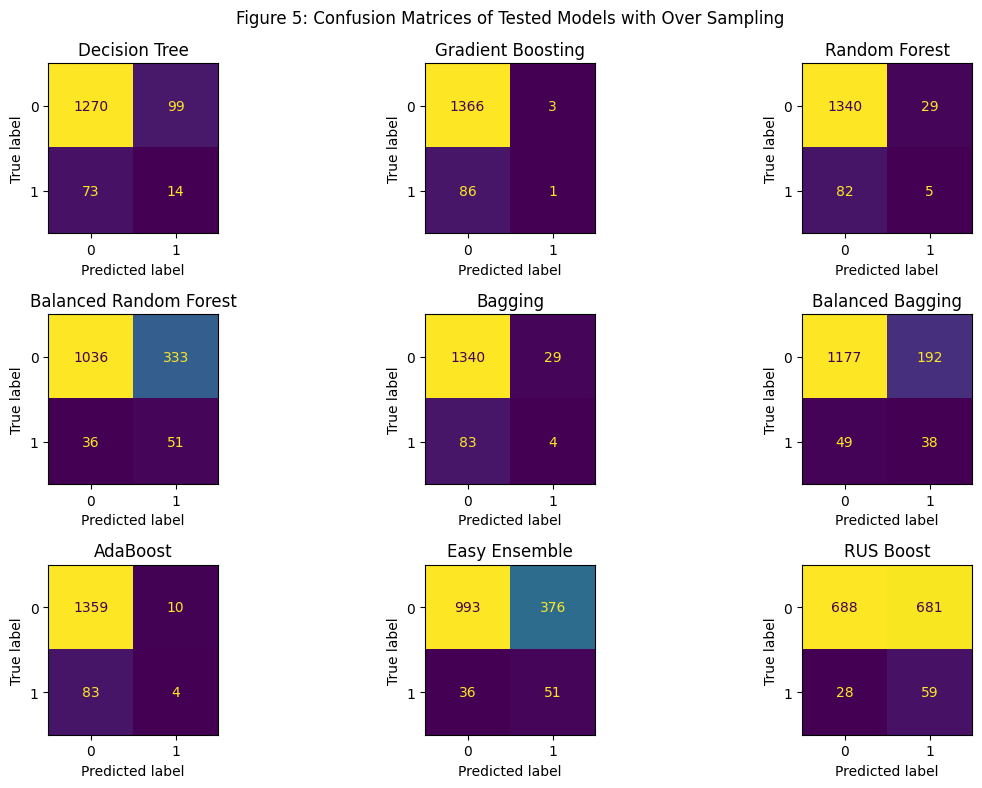

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.881868           0.544302  0.140000   0.543773
Gradient Boosting             0.938874           0.504651  0.021978   0.768062
Random Forest                 0.923764           0.518144  0.082645   0.724281
Balanced Random Forest        0.746566           0.671482  0.216561   0.741497
Bagging                       0.923077           0.512397  0.066667   0.734432
Balanced Bagging              0.834478           0.648267  0.239748   0.724419
AdaBoost                      0.936126           0.519336  0.079208   0.696011
Easy Ensemble                 0.717033           0.655777  0.198444   0.705096
RUS Boost                     0.513049           0.590359  0.142684   0.625224


In [27]:
summary_df5 = show_performance(model_dict, X_train_SMOTE, X_test, y_train_SMOTE, y_test, 'Figure 5: Confusion Matrices of Tested Models with Over Sampling')
print(summary_df5)

### Combined Method

c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
c:\Users\Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
c:\Users\P

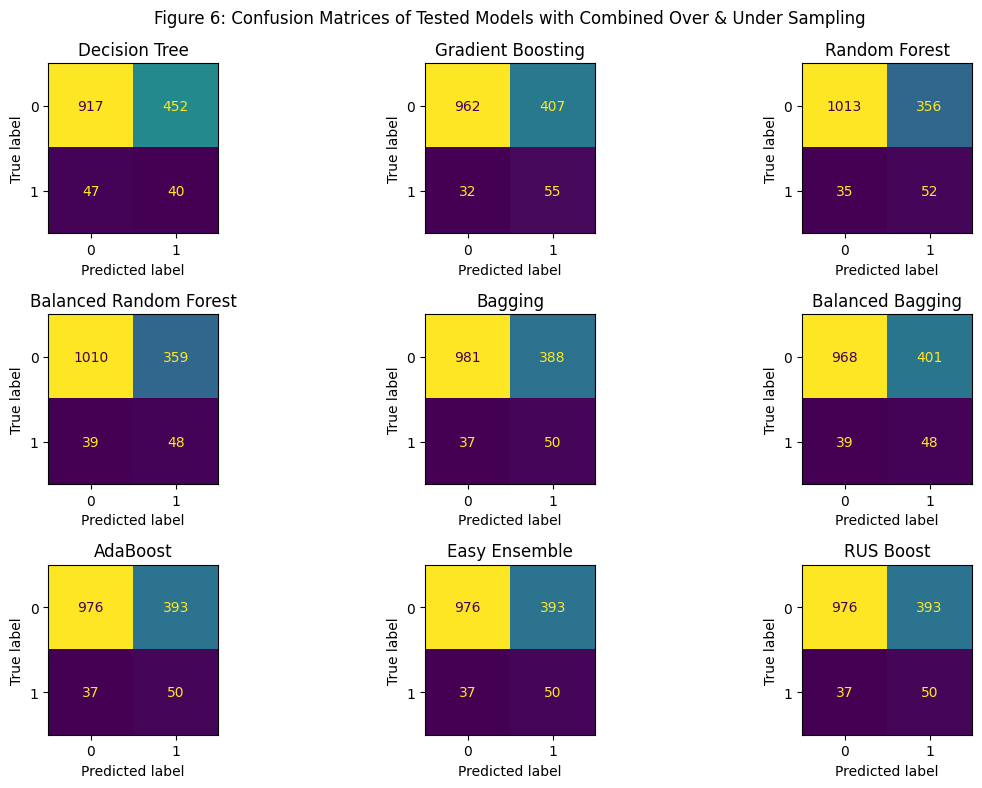

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=888)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=1)
X_over, y_over = over.fit_resample(X_train,y_train)
X_combined, y_combined = under.fit_resample(X_over, y_over)
summary_df6 = show_performance(model_dict, X_combined, X_test, y_combined, y_test, 'Figure 6: Confusion Matrices of Tested Models with Combined Over & Under Sampling')

In [29]:
print(summary_df6)

                        Accuracy Score  Balanced Accuracy  f1_score  AUC_score
Decision Tree                 0.657280           0.564801  0.138169   0.567270
Gradient Boosting             0.698489           0.667443  0.200364   0.730611
Random Forest                 0.731456           0.668829  0.210101   0.709281
Balanced Random Forest        0.726648           0.644744  0.194332   0.713693
Bagging                       0.708104           0.645647  0.190476   0.683623
Balanced Bagging              0.697802           0.629405  0.179104   0.683623
AdaBoost                      0.704670           0.643821  0.188679   0.692770
Easy Ensemble                 0.704670           0.643821  0.188679   0.692770
RUS Boost                     0.704670           0.643821  0.188679   0.692770


## Customized Ensemble Method

In [30]:
class EnsembleModel:
    def __init__(self, base_estimator, features_X, target_y):
        #self.base_estimator = base_estimator
        #self.n = n_estimators
        self.X = features_X
        self.y = target_y
        self.n_estimators = 16#int(target_y.value_counts[0]/target_y.value_counts[1])
        self.model_dict = {}
        for i in range(self.n_estimators):
            self.model_dict['model{}'.format(i+1)] = base_estimator
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, stratify=self.y, random_state=888)
    def data_separation(self):
        #X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, stratify=y, random_state=888)
        df_train = self.X_train.copy()
        df_train['86'] = self.y_train
        df_train_class0 = df_train[df_train['86']==0]
        df_train_class1 = df_train[df_train['86']==1]
        df_train_class0_split = np.array_split(df_train_class0, self.n_estimators)
        return df_train_class0_split, df_train_class1
    def train(self):
        df_train_class0_split, df_train_class1 = self.data_separation()
        #model_dict = {}
        for i in range(self.n_estimators):
            df_subset_train = pd.concat([df_train_class0_split[i], df_train_class1]).sample(frac=1)
            df_subset_y = df_subset_train['86']
            df_subset_X = df_subset_train.drop('86', axis=1)
            #model_i = self.base_estimator
            #model_i.fit(df_subset_X, df_subset_y)
            self.model_dict['model{}'.format(i+1)].fit(df_subset_X, df_subset_y)
        #return model_dict
    
    def major_voting_predict(self):
        pred_dict = {}
        for i in range(self.n_estimators):
            y_pred_i = self.model_dict['model{}'.format(i+1)].predict(self.X_test)
            pred_dict['y_pred{}'.format(i)] = y_pred_i
        df_pred = pd.DataFrame.from_dict(pred_dict)
        df_pred['sum'] = df_pred.sum(axis=1)/self.n_estimators
        df_pred['y_pred_voted'] = df_pred['sum'].apply(lambda x: 1 if x>0.5 else 0)
        #df_pred['y_test'] = self.y_test
        return df_pred, self.y_test

In [102]:
ensemble_model = EnsembleModel(base_estimator = DecisionTreeClassifier(), features_X=X, target_y=y)
ensemble_model.train()
df_pred, y_test=ensemble_model.major_voting_predict()
print(classification_report(y_test, df_pred['y_pred_voted']))

              precision    recall  f1-score   support

           0       0.96      0.62      0.76      1095
           1       0.09      0.59      0.16        70

    accuracy                           0.62      1165
   macro avg       0.52      0.60      0.46      1165
weighted avg       0.91      0.62      0.72      1165



In [32]:
df_f1_score = pd.DataFrame(index=summary_df1.index)
methods_list = ['original data', 'PCA', 'RandomUnderSample', 'SMOTE','Combined']
summary_list = [summary_df1, summary_df2, summary_df3, summary_df5, summary_df6]
for i in range(len(methods_list)):
    df_f1_score[methods_list[i]] =  summary_list[i]['f1_score']
df_f1_score

,original data,PCA,RandomUnderSample,SMOTE,Combined
Decision Tree,0.150289,0.109756,0.654971,0.140000,0.138169
Gradient Boosting,0.021277,0.021277,0.722892,0.021978,0.200364
Random Forest,0.069565,0.054054,0.691358,0.082645,0.210101
Balanced Random Forest,0.187726,0.201521,0.687898,0.216561,0.194332
Bagging,0.064516,0.018692,0.718563,0.066667,0.190476
Balanced Bagging,0.227273,0.206718,0.707317,0.239748,0.179104
AdaBoost,0.081633,0.040404,0.678571,0.079208,0.188679
Easy Ensemble,0.174326,0.189893,0.662577,0.198444,0.188679
RUS Boost,0.119554,0.187364,0.702381,0.142684,0.188679


# Selecting Model and Exporting Predicted Data

* As can be seen in the performances of multiple data processing measures, there is only models with random under sampling method producing high f1-score for the minority class (customers buying MANU policy) in this context of highly unbalanced data. 
* Regarding model categories, Balanced Random Forest, Gradient Boosting and Bagging Classifiers are the methods giving high performance with f1 score of 0.688, 0.723 and 0.719 respectively.
In particular, Balanced Random Forest reduces the number of False Positive (customers buying MANU but predicted not buying) whereas Gradient Boosting and Bagging both show a smaller number of False Negative (customers not buying MANU but predicted buying). 
* In the case of prediction for marketing strategy, FP could be more important than FN since promoting for wrong people that will not actually buy the policy will produce less potential benefit loss than not marketing for ones that will defnitely take it.
Therefore, Bagging Classifier and Gradient Boosting should be more prioritized to be selected in this case. Therefore, I will produce a text file with predicting results of all these 2 selected models for further consideration of difference case scenarios that possibly happen in reality.
* Followingly, the full given training dataset will be utilized to produce prediction results to theoretically enhance the generalization of model for the data's context and also model's performance in convergence/fitting.

### Grid Search for Hyperparameters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_train = pd.read_csv("train_data.txt", sep=",")
df_train.drop('ID', axis=1, inplace=True)
parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10*(i+1) for i in range(10)]
    }
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(GradientBoostingClassifier(), parameters, n_iter=100)
y = df_train['86']
X = df_train.drop('86', axis=1)
us_RUS = RandomUnderSampler()
X_RUS, y_RUS = us_RUS.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_RUS, y_RUS, test_size=0.25, random_state=8)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7298717948717949
{'n_estimators': 60, 'min_samples_leaf': 0.42727272727272736, 'max_depth': 3, 'learning_rate': 0.075}


In [11]:
us_RUS = RandomUnderSampler()
#X_train_RUS, y_train_RUS = us_RUS.fit_resample(X_train, y_train)
graBoost_grid = GradientBoostingClassifier(n_estimators=60, min_samples_leaf= 0.42727272727272736, learning_rate=0.075, random_state=888)
graBoost_grid.fit(X_train, y_train)
y_pred_grid_proba = graBoost_grid.predict_proba(X_test)[:,1]
y_pred_grid = graBoost_grid.predict(X_test)
auc_score_grid = roc_auc_score(y_test, y_pred_grid_proba)

graBoost = GradientBoostingClassifier(n_estimators=100, random_state=888)
graBoost.fit(X_train, y_train)
y_pred_proba = graBoost.predict_proba(X_test)[:,1]
y_pred = graBoost.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [12]:
print(auc_score_grid, auc_score)

0.7406844608879493 0.7924154334038055


### On test data

In [ ]:
df_train = pd.read_csv("train_data.txt", sep=",")
df_train.drop('ID', axis=1, inplace=True)
df_test = pd.read_csv("test_data.txt", sep=",")
df_test_ID = df_test['ID']
df_test.drop('ID', axis=1, inplace = True)

y_train = df_train['86']
X_train = df_train.drop('86', axis=1)
X_test = df_test

In [4]:
from imblearn.under_sampling import RandomUnderSampler
us_RUS = RandomUnderSampler()
X_train_RUS, y_train_RUS = us_RUS.fit_resample(X_train, y_train)


In [5]:
# Selected Gradient Boosting Model
graBoost = GradientBoostingClassifier(n_estimators=100, random_state=888)
graBoost.fit(X_train_RUS, y_train_RUS)
y_pred_graBoost = graBoost.predict(X_test)


# Selected Bagging Method
bagging = BaggingClassifier(n_estimators=100, random_state=888)
bagging.fit(X_train_RUS, y_train_RUS)
y_pred_bagging = bagging.predict(X_test)


In [6]:
prob_y_pred = graBoost.predict_proba(X_test)[:,1]

In [21]:
prob_y_pred_bagg = bagging.predict_proba(X_test)[:,1]

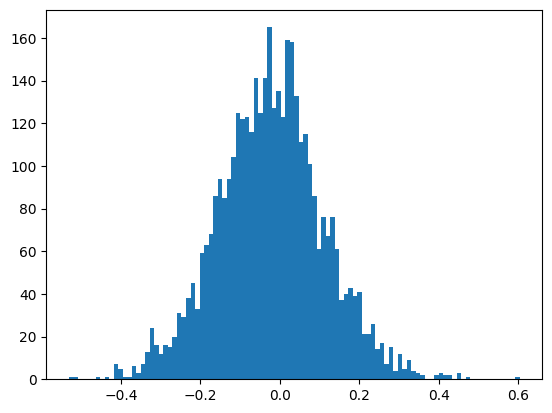

In [22]:
dif_prob = prob_y_pred - prob_y_pred_bagg
plt.hist(dif_prob, bins=100)
plt.show()

In [7]:
X_test['ID'] = df_test_ID
X_test['pred_graBoost'] = y_pred_graBoost
#X_test['pred_bagging'] = y_pred_bagging
X_test['prob_y_pred'] = prob_y_pred

In [ ]:
X_test[['ID', 'prob_y_pred', 'pred_graBoost']]

In [9]:
df_pred_ID_prob = X_test[['ID', 'prob_y_pred', 'pred_graBoost']].sort_values(by=['prob_y_pred'], ascending=False).head(800)
df_pred_ID_prob

,ID,prob_y_pred,pred_graBoost
2621,2622,0.974838,1
3915,3916,0.973389,1
3499,3500,0.966218,1
2016,2017,0.958663,1
1113,1114,0.956515,1
...,...,...,...
3016,3017,0.661519,1
3316,3317,0.661278,1
3360,3361,0.661085,1
1678,1679,0.660836,1


In [10]:
X_test['pred_graBoost'].value_counts()

0    2591
1    1409
Name: pred_graBoost, dtype: int64

In [24]:
df_pred_ID_prob.to_csv('top_800IDs_prob', index=None, sep=',', mode='a')

In [25]:
df_pred_ID_prob['ID'].to_csv('top_800IDs', index=None, sep=',', mode='a')

In [37]:
X_test.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,ID,pred_graBoost,pred_bagging
0,33,1,4,2,8,0,6,0,3,5,...,0,1,0,0,0,0,0,1,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,1,0,0,0,0,0,2,1,1
2,39,1,3,3,9,1,4,2,3,5,...,0,1,0,0,0,0,0,3,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,1,0,0,0,0,0,4,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,1,0,0,0,0,0,5,0,0


In [40]:
X_test.to_csv('predicted_data', index=None, sep=',', mode='a')

In [41]:
df_train['86'].value_counts()

0    5474
1     348
Name: 86, dtype: int64

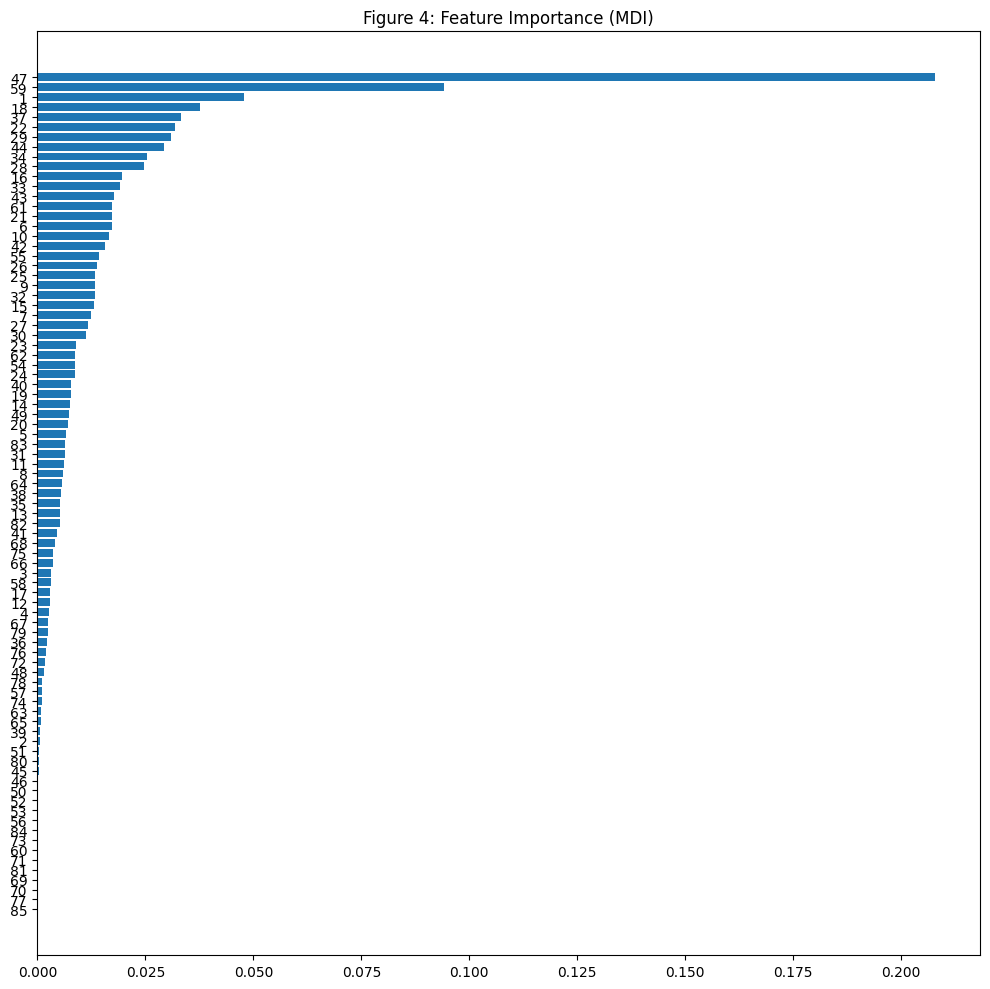

In [74]:
feature_importance = graBoost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(10, 10))

plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_test.columns)[sorted_idx])
plt.title("Figure 4: Feature Importance (MDI)")

fig.tight_layout()
plt.show()

# Explanation

* Top 5 features with high weights of importance will be selected for exploratory data analysis.

In [56]:
df_train = pd.read_csv("train_data.txt", sep=",")
selected_cols=['47','59','1', '18','37','86']
real_name = ['Contribution Car Policies', 'Contribution Fire Policies', 'Customer Subtype', 'Lower Level Education', 'Income 30.000','MANU Policies']
for i in range(len(selected_cols)):
    print("{}:{}".format(real_name[i], df_train[selected_cols[i]].unique()))

Contribution Car Policies:[6 0 5 7 8 4]
Contribution Fire Policies:[5 2 6 0 3 4 1 7 8]
Customer Subtype:[33 37  9 40 23 39 11 10 41 38 22 13 31 34 24  8  7  3 36 25 20 12 35 30
 29 32  1 26  2  4 16  5 21  6 18 27 28 17 15 19]
Lower Level Education:[7 4 2 0 5 6 8 3 1 9]
Income 30.000:[0 2 4 1 5 7 3 9 6 8]
MANU Policies:[0 1]


In [68]:
df_analyse =df_train[selected_cols]
df_analyse=df_analyse.rename(columns={selected_cols[i]:real_name[i] for i in range(6)})

In [69]:
df_analyse

,Contribution Car Policies,Contribution Fire Policies,Customer Subtype,Lower Level Education,Income 30.000,MANU Policies
0,6,5,33,7,0,0
1,0,2,37,4,2,0
2,6,2,37,4,4,0
3,6,2,9,2,1,0
4,0,6,40,0,0,0
...,...,...,...,...,...,...
5817,6,3,36,2,4,0
5818,0,5,35,9,0,0
5819,6,4,33,8,5,1
5820,6,0,34,7,0,0


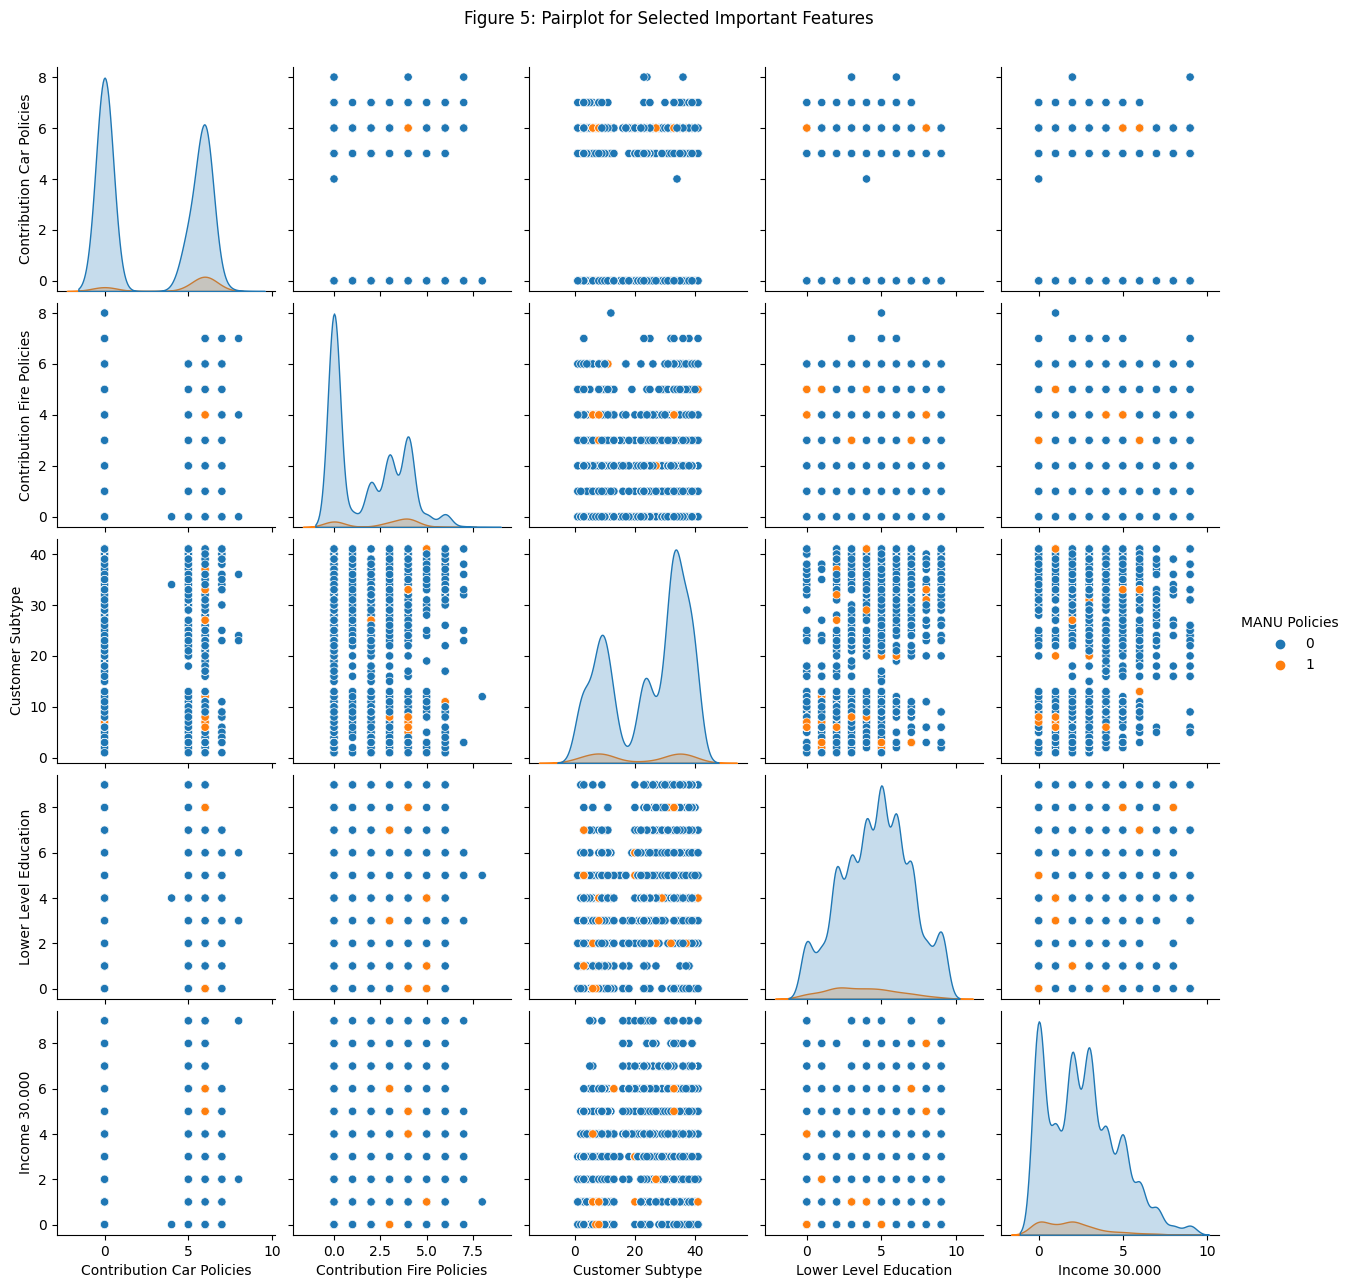

In [75]:
sns.pairplot(data=df_analyse,hue='MANU Policies',
             diag_kind='kde').fig.suptitle('Figure 5: Pairplot for Selected Important Features', y=1.03)
plt.show()